### Necessary Imports

In [ ]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Reading Data

In [ ]:
# Read the dataset
dataset = pd.read_csv('price-prediction.csv')

### Visualize Datapoints in Data

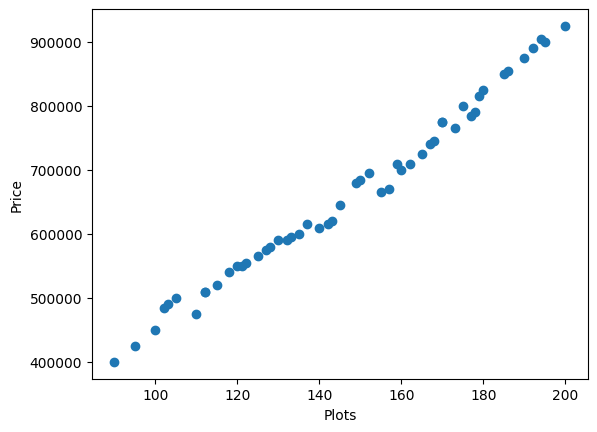

In [ ]:
# Plot the dataset
plt.scatter(dataset.PLOTS, dataset.PRICE)

# Set the labels for the x and y axes
plt.xlabel('Plots')
plt.ylabel('Price')


# Display the plot
plt.show()

### Some Base Functions

In [ ]:
def plot_data(m, b, dataset):
    # Plot the data points as a scatter plot
    x = dataset['PLOTS'].values
    y = dataset['PRICE'].values
    plt.scatter(x, y)

    # Find min and max values in the data
    min_x = np.min(x)
    max_x = np.max(x)

    # Plot the line defined by y = m * x + b
    eq1 = m * min_x + b
    eq2 = m * max_x + b
    plt.plot([min_x, max_x], [eq1, eq2], color = 'green')

    # Set the labels for the x and y axes
    plt.xlabel('PlotSize')
    plt.ylabel('PlotPrice')

    # Set the title for the plot
    plt.title('PlotPricePrediction')

    # Display the plot
    plt.show()


In [ ]:
def loss_function(m, c, points):
    # Initialize the total error to 0
    tot_error = 0
    #points = points.values

    # Loop through all the points in the dataset
    for i in range(len(points)):
        # Get the 'x' and 'y' values of the current 'point'
        x = points.iloc[i]['PLOTS']
        y = points.iloc[i]['PRICE']
        # Calculate the error for this point and add it to the total error
        tot_error = tot_error + abs(y-(m*x +b))
    # Return the average error for all points
    avg_err = tot_error/len(points)
    return avg_err

In [ ]:
# Formula of slope: -1/N * x * (y - (m * x + b))
# Formula of y_intercept: -1/N * (y - (m * x + b))

def gradient_descent(current_m, current_b, points, lr):
    # Initialize the gradients for m and b to 0
    m_gradient = 0
    b_gradient = 0
    # Get the number of points in the dataset
    n = len(points)
    # Loop through all the points in the dataset
    for i in range(n):
        # Get the 'x' and 'y' values of the current 'point'
        x = points.iloc[i]['PLOTS']
        y = points.iloc[i]['PRICE']
        # Calculate the partial derivatives of the loss function with respect to m and b
        b_gradient = b_gradient +(-2/n) * (y - (current_m*x)+current_b)
        m_gradient =  m_gradient +(-2/n) * x * (y-(current_m*x)+current_b)

    # Update 'm' and 'b' using gradient descent
    new_m = current_m - lr * m_gradient
    new_b = current_b - lr * b_gradient
    # Return the updated values of m and b

    return new_m, new_b

### Running Script

Epoch 0 - Error: 296277205.1035503


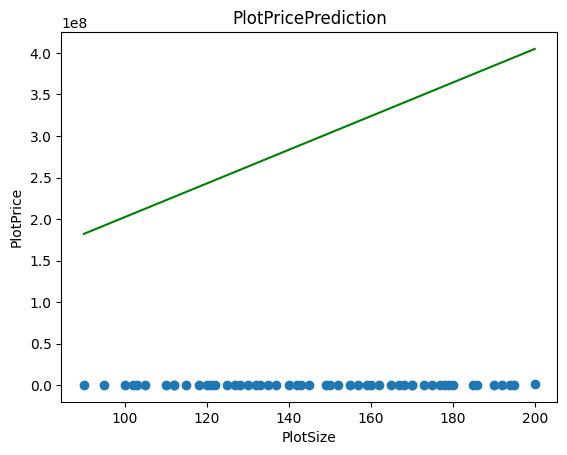

None
Epoch 5 - Error: 5.31362137731474e+21


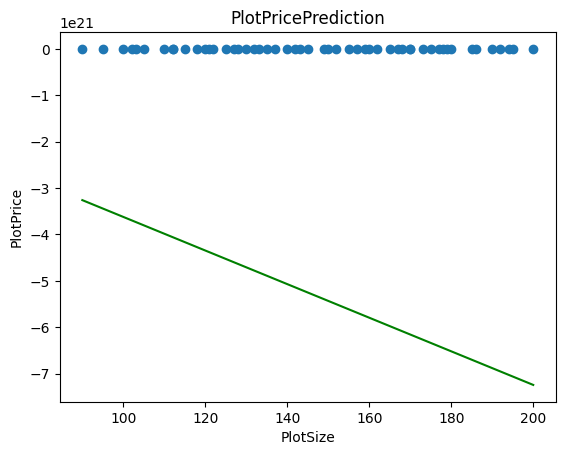

None
Epoch 10 - Error: 9.529792320054057e+34


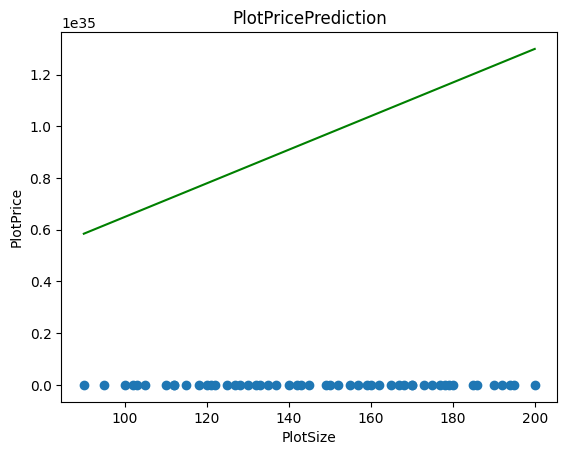

None
Epoch 15 - Error: 1.709134603588489e+48


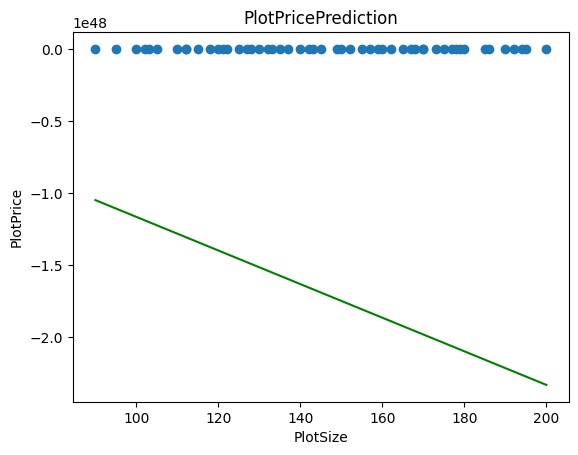

None
m = -4.668635518479954e+56, b = -3.055017454521677e+54


In [ ]:
# Initialize the values of m and b to 0
m = 0
b = 0
error_list = []
# Set the learning rate and number of epochs for gradient descent
lr = 0.01
epochs = 20

# Perform gradient descent for the specified number of epochs
for i in range(epochs):
    # Update m and b using gradient descent
    m, b = gradient_descent(m, b, dataset, lr)
    error = loss_function(m, b, dataset)
    error_list.append(error)
    # Every 50 epochs, plot the data and the current line being fit to the data
    if i % 5 == 0:
        # Print the current epoch number and the error for this epoch
        print("Epoch {0} - Error: {1}".format(i, error))
        plot_data(m, b, dataset)
        print(plt.show())
        # also plot error and epoch number in a graph to see how error is decreasing

print("m = {0}, b = {1}".format(m, b))

### Predicting New Data

In [ ]:

plt_sz = input("Input Plot Size:")
x = float(plt_sz)
prediction = m*x+b
print(f'Price for {x} size of plot should be around $:{prediction}')

Input Plot Size:5
Price for 5.0 size of plot should be around $:-2.3373727766944988e+57


<hr>